In [52]:
import pandas as pd
import numpy as np
from numpy.random import randn

In [53]:
##stats

from scipy import stats
## plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [54]:
plt.style.use('seaborn-whitegrid')

In [55]:
dataset = randn(25)

In [56]:
dataset

array([ 1.24862079,  0.96682172,  0.79097305, -0.46637054, -1.35812925,
       -0.7632355 , -1.43069314, -0.62165826,  1.20914372,  0.15180854,
        1.20794221,  0.3864623 ,  0.12377517,  1.32761427,  1.88696677,
        0.57270259, -0.45981972, -0.48712518,  0.65137659,  1.79003718,
       -0.80771693,  0.24130681,  0.27977684,  1.46489637,  0.96451087])

(0.0, 1.0)

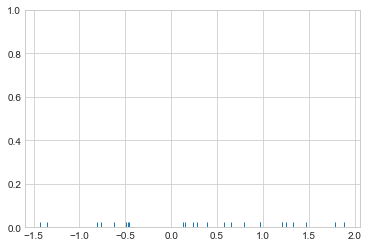

In [57]:
sns.rugplot(dataset)
plt.ylim(0,1)  ## ylimit is 0 to 1

<AxesSubplot:>

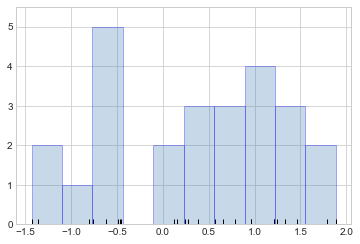

In [58]:
plt.hist(dataset, alpha = 0.3, histtype='bar', color='steelblue', edgecolor = 'blue')
sns.rugplot(dataset, color= 'black')

In [59]:
xmin = dataset.min() - 2
xmin

-3.4306931431542265

In [60]:
xmax = dataset.max() + 2
xmax

3.886966773617037

In [63]:
xaxis = np.linspace(xmin, xmax, 10)   ##why 2 above
xaxis

array([-3.43069314, -2.61761982, -1.80454649, -0.99147317, -0.17839985,
        0.63467348,  1.4477468 ,  2.26082013,  3.07389345,  3.88696677])

In [64]:
bandwidth = (4*(dataset.std()**5)/(3*len(dataset)))**0.2

In [65]:
bandwidth

0.519022465867161

In [66]:
klist = []

(0.0, 1.0)

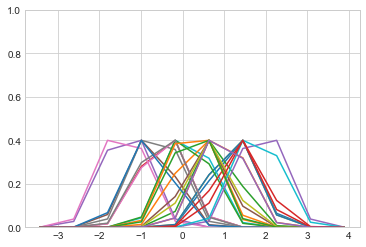

In [67]:
for d in dataset:
    kernel = stats.norm(d, bandwidth).pdf(xaxis)
    klist.append(kernel)
    
    kernel = kernel/kernel.max()
    kernel = kernel*0.4   ## 0.4 average highest value we suppose and 2,-2 to increase the range
    plt.plot(xaxis, kernel)
    
plt.ylim(0,1)    

In [68]:
sumkde = np.sum(klist, axis=0)

Text(0.5, 0.98, 'sum of basic')

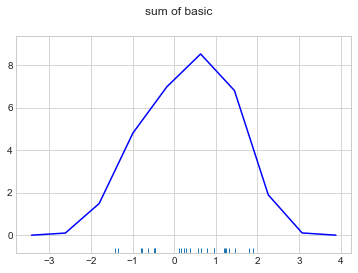

In [105]:
fig = plt.plot(xaxis, sumkde, color= 'blue')
sns.rugplot(dataset)

#plt.yticks([])  ## to remove y axis
plt.suptitle("sum of basic")

In [106]:
sumkde

array([7.27622591e-04, 1.00687171e-01, 1.49277529e+00, 4.81532846e+00,
       6.98467319e+00, 8.53182927e+00, 6.80935789e+00, 1.89873953e+00,
       1.05749762e-01, 7.00975368e-04])

<AxesSubplot:ylabel='Density'>

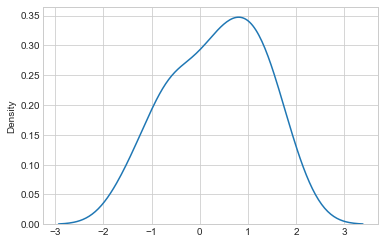

In [72]:
sns.kdeplot(dataset)

<AxesSubplot:>

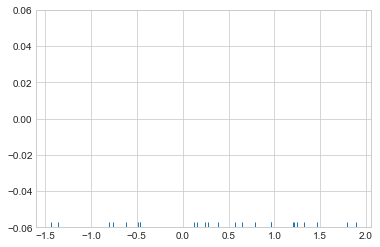

In [73]:
sns.rugplot(dataset)  ##changes according to y axis in pct

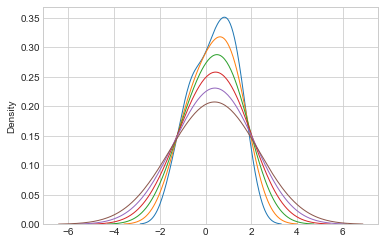

In [95]:
i = 0.5
while i<2.:
    sns.kdeplot(dataset, lw=1, label = i, bw_method=i)  ##line width = lw
    i = i+0.25

In [96]:
#koption = ['biw', 'cos', 'epa', 'gau', 'tri', 'triw']

D:\stdy\datasc\lib\site-packages\seaborn\distributions.py:1668: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)


<AxesSubplot:ylabel='Density'>

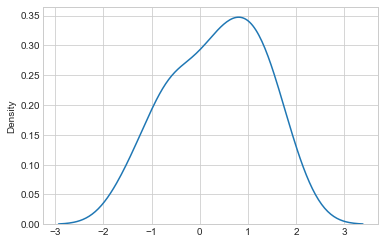

In [97]:
sns.kdeplot(dataset, kernel = 'gau', label = i )

<AxesSubplot:ylabel='Density'>

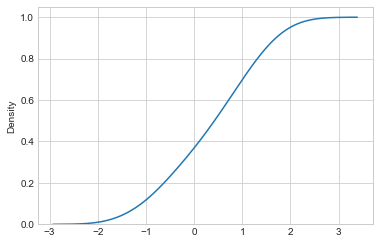

In [98]:
sns.kdeplot(dataset, cumulative = True)

In [99]:
## MULTI-VARIATE KDE
mean = [0,0]
cov = [[1,0],[0,100]]

dataset2 = np.random.multivariate_normal(mean, cov, 1000)

In [100]:
dataset2

array([[  0.83464615, -13.24145155],
       [  1.19592913,  -0.27253284],
       [ -0.42931738,  11.96170255],
       ...,
       [ -0.58566245, -11.42379988],
       [ -0.93486612,   6.80121949],
       [ -0.58123938,   2.89258801]])

In [101]:
dframe = pd.DataFrame(dataset2, columns = ['X','Y'])

In [102]:
dframe

,X,Y
0,0.834646,-13.241452
1,1.195929,-0.272533
2,-0.429317,11.961703
3,1.084804,7.704271
4,-0.165341,-13.995765
...,...,...
995,1.422674,-5.858612
996,0.157355,-3.631346
997,-0.585662,-11.423800
998,-0.934866,6.801219


D:\stdy\datasc\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='X', ylabel='Y'>

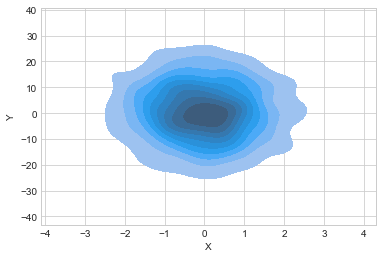

In [103]:
sns.kdeplot(dframe.X, dframe.Y, shade = 'green')

In [104]:
cov

[[1, 0], [0, 100]]